NOTA: NO CORRER ESTE NOTEBOOK 
---
# Resultados Mini-Concurso: Predecir si un pasajero del Titanic Sobrevive

25 de Mayo del 2020

<img src="https://docs.google.com/uc?export=download&id=1VE0J-XRaWvFf5g-FDRrn4SJDgkAg5Zcx" width="500" align="middle">

### a) **Objetivos**: 

- Predecir si un pasajero del Titanic sobrevive usando el conjunto ``X_test`` y los 3 algoritmos (KNN/LR/DT) utilizando todos/algunos/ninguno de los conceptos de preprocesamiento. 
- Elija el mejor modelo para realizar las predicciones.
- Si utilizan algún tipo de selección de variables, deben indicar los nombres de las variables seleccionadas.

### Evaluación:

Los modelos son evaluados usando **precision**, **recall**, **f1-measure**.
`sklearn.metrics.precision_recall_fscore_support`


In [97]:
import pandas as pd
import numpy as np
from google.colab import data_table

url = 'contest_05272020.csv'
ttnc_pred_df = pd.read_csv(url)

data_table.DataTable(ttnc_pred_df, include_index=True, num_rows_per_page=10)

,survival,VictorHP,MauricioTA,DanielSA,AlbertoA,LidiaJudithLR,LidiaJudithDT,LidiaJudithKnn,PamelaA,Gonzalo,LuisCas,Marco Antonio
0,0,0,0,1,1,0,0,0,1,0,0,0
1,1,1,1,1,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,0,0,0,0,0,1,0,0,0
258,0,0,0,0,0,0,0,0,1,0,0,0
259,0,0,0,1,0,0,0,0,1,0,1,0
260,0,0,0,1,0,0,0,0,1,0,0,0


## Calculo de las Métricas para los Resultados

In [0]:
from sklearn.metrics import precision_recall_fscore_support as score
import pandas as pd

y_true = ttnc_pred_df.survival
participants = ttnc_pred_df.columns[1:]

res_prec = pd.DataFrame(index=[0],columns=participants)
res_recall = pd.DataFrame(index=[0],columns=participants)
res_f1score = pd.DataFrame(index=[0],columns=participants)

res_prec.fillna(0)
res_recall.fillna(0)
res_f1score.fillna(0)

for part in participants:
  tmp_yhat = ttnc_pred_df[part]
  precision, recall, fscore, support = score(y_true, tmp_yhat, 
                                             pos_label=1, average = 'binary')

  res_prec[part] = precision
  res_recall[part] = recall
  res_f1score[part] = fscore

res_prec_mlt = pd.melt(res_prec)
res_recall_mlt = pd.melt(res_recall)
res_f1score_mlt = pd.melt(res_f1score)

res_prec_mlt = res_prec_mlt.sort_values(['value'], 
                                        ascending=False).reset_index(drop=True)
res_recall_mlt = res_recall_mlt.sort_values(['value'], 
                                        ascending=False).reset_index(drop=True)
res_f1score_mlt = res_f1score_mlt.sort_values(['value'], 
                                        ascending=False).reset_index(drop=True)                                                                                

## 1. Precision

,variable,value
0,LidiaJudithLR,0.813333
1,MauricioTA,0.808219
2,Marco Antonio,0.802326
3,VictorHP,0.789474
4,Gonzalo,0.752809
5,LidiaJudithKnn,0.735632
6,LidiaJudithDT,0.730337
7,LuisCas,0.705882
8,AlbertoA,0.394737
9,DanielSA,0.329268


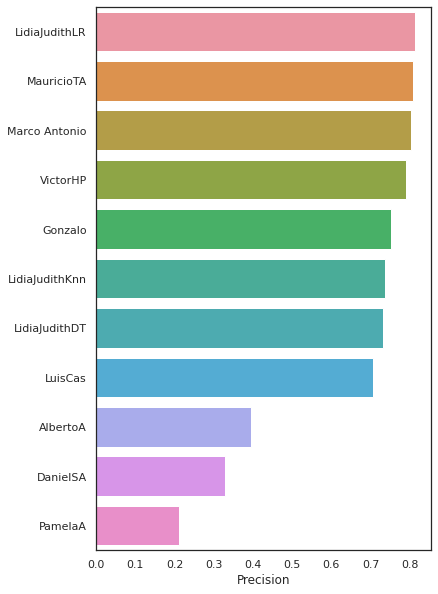

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
f, ax = plt.subplots(figsize=(6, 10))
sns.set_style("white")
sns.set_color_codes("pastel")

sns.barplot(x="value", y="variable", data=res_prec_mlt,
            label="Total");

ax.set(xlabel="Precision", ylabel='');

data_table.DataTable(res_prec_mlt, include_index=True, num_rows_per_page=11)

## 2. Recall

,variable,value
0,Marco Antonio,0.69
1,Gonzalo,0.67
2,LidiaJudithDT,0.65
3,LidiaJudithKnn,0.64
4,LidiaJudithLR,0.61
5,VictorHP,0.60
6,MauricioTA,0.59
7,LuisCas,0.48
8,PamelaA,0.38
9,AlbertoA,0.30


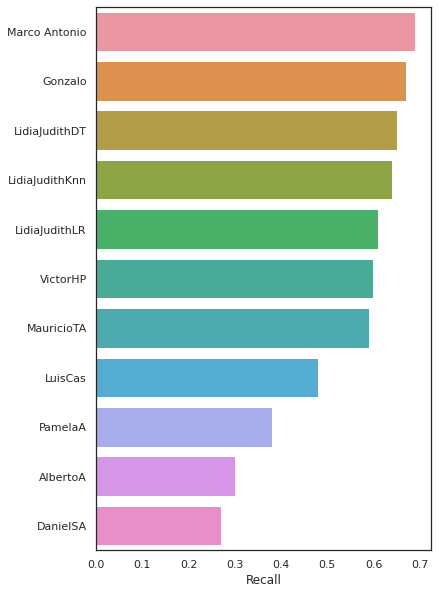

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
f, ax = plt.subplots(figsize=(6, 10))
sns.set_style("white")
sns.set_color_codes("pastel")

sns.barplot(x="value", y="variable", data=res_recall_mlt,
            label="Total");

ax.set(xlabel="Recall", ylabel='');

data_table.DataTable(res_recall_mlt, include_index=True, num_rows_per_page=11)

## 3. F1-Score

,variable,value
0,Marco Antonio,0.741935
1,Gonzalo,0.708995
2,LidiaJudithLR,0.697143
3,LidiaJudithDT,0.687831
4,LidiaJudithKnn,0.684492
5,MauricioTA,0.682081
6,VictorHP,0.681818
7,LuisCas,0.571429
8,AlbertoA,0.340909
9,DanielSA,0.296703


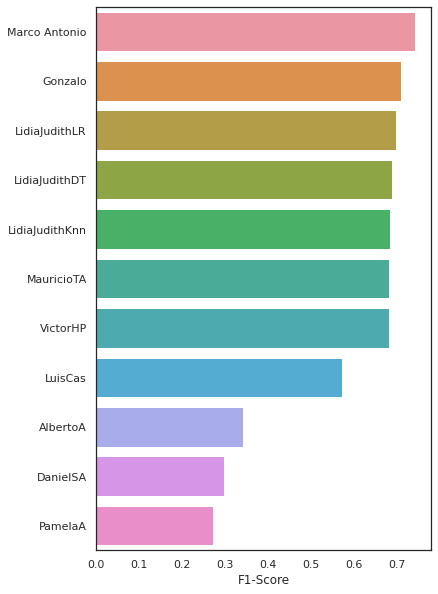

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
f, ax = plt.subplots(figsize=(6, 10))
sns.set_style("white")
sns.set_color_codes("pastel")

sns.barplot(x="value", y="variable", data=res_f1score_mlt,
            label="Total");

ax.set(xlabel="F1-Score", ylabel='');

data_table.DataTable(res_f1score_mlt, include_index=True, num_rows_per_page=11)